In [1]:
import numpy as np
from numpy import pi as pi
from qutip import *
import matplotlib.pyplot as plt

In [281]:
Nph = 10
w_m = 50
chi_m = 1

def coupling_density(w):
    h = 6.626e-34
    hbar = h/(2*pi)
    kB = 1.38e-23

    g1 = 2*pi
    g2 = 2*pi
    E = 1050e9
    v = 0.2
    T = 4     
    rho = 3515

    mu = E/(2*(1+v))
    lbd = E*v/((1+v)*(1-2*v))

    vt = np.sqrt(mu/rho)
    vl = np.sqrt((lbd+2*mu)/rho)

    w = w*1e9/(2*pi)
    return (g1**2 + g2**2) * 1/(pi*rho) * (1/(5*vt**5) + 2/(15*vl**5))*w**3 *1e-9

In [282]:
lx = basis(2,0)
ly = basis(2,1)
Lup = lx*ly.dag()
Ldown = Lup.trans()
Lx = Lup + Ldown
Ly = -1j*Lup + 1j*Ldown
Lz = lx*lx.dag() - ly*ly.dag()
lp = Ly.eigenstates()[1][1]
lm = Ly.eigenstates()[1][0]

su = basis(2,0)
sd = basis(2,1)
Sup = su*sd.dag()
Sdown = Sup.trans()
Sx = Sup + Sdown
Sy = -1j*Sup + 1j*Sdown
Sz = su*su.dag() - sd*sd.dag()

T1 = 1
Gamma_ph = 1/(2*np.pi*T1)

{0.0, 50.249378105604414}
50.249378105604414


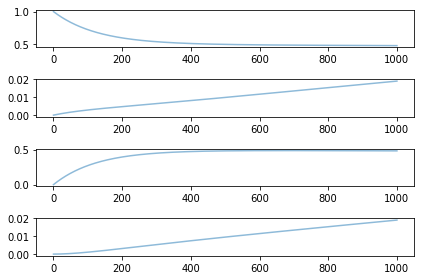

In [357]:
SO = 50
HSO = SO/2 * tensor(Ly, Sz)

Omega = 0
w_rf = 5 if Omega else 0
Hint = tensor(qeye(2),-w_rf*Sz + Omega*Sx)

muB = 28
Bx = 5/muB
Bz = 0/muB
Hmag = tensor(qeye(2), muB/2*(Bx*Sx + Bz*Sz ))

alpha = 0
beta = 0
gamma = 0
Hstrain = tensor(alpha*Lx + beta*Ly + gamma*Lz, qeye(2))

H0 = Hmag + Hstrain + HSO # + mu_B*B*tensor(qeye(2),Sz)

def spectrum(w):
  if w == 0.0: # dephasing inducing noise
    return np.sqrt(1/(40*2*pi))
  else: # relaxation inducing noise
    return np.sqrt(1/(40*2*pi))/2* w * (w > 0.0)

t = np.linspace(0,1000,500)
eigs, eigsts = (H0).eigenstates()

transition_energies = []
for i in range(len(eigs)):
  for j in range(len(eigs)):
    if j != i:
      transition_energies.append(eigs[j]-eigs[i])
print(set(np.abs(transition_energies)))
print(max(np.abs(transition_energies)))

e_ops = []
for eigst in eigsts:
  e_ops.append(eigst*eigst.dag())

rho0 = eigsts[0]*eigsts[0].dag()
a_ops = [tensor(Lx, qeye(2))]
c_ops = [
  np.sqrt(1/(40*2*pi))*tensor(Lx,qeye(2))
  #np.sqrt(1/(500*2*pi))*tensor(qeye(2),Sx)
]
# res = brmesolve(H0+Hint, rho0, t, a_ops=[tensor(Ldown + Lup,qeye(2))], e_ops=e_ops, spectra_cb=[spectrum])
res = mesolve(H0+Hint, rho0, t, e_ops=e_ops, c_ops=c_ops)

fig, axs = plt.subplots(len(res.expect),1)
for i, exp in enumerate(res.expect):
  axs[i].plot(t, exp, alpha=0.5, label=i)
plt.tight_layout()

In [360]:
H0.eigenstates()[1][1].dag() * tensor(Lx,qeye(2)) * H0.eigenstates()[1][0]

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.09950372]]